# Pytorch Workflow
* Data (prepare and load)
* Build model 
* Fitting the model to data (training)
* Making predictions and exaluating the model (inference)
* Saving and loading the model
* Putting it all together

In [4]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# Checking torch version
torch.__version__

'2.1.1+cu121'

## Data (Preparing and Loading)
Data can be almost anything in machine learning from excel spreadsheets to videox, audio, DNA, Text, Images

Machine Learning has mainly two parts
1. Get data into numerical representation.
2. Build a model to learn patterns in that numerical representation.

Next we will create some known data using linear regression formula.
We will use a linear regression formula to make a straight line with *known* **parameters**

A linear regression line has an equation of the form:
 
#### Y = a +bX

 we will modify the equation a little bit and replace the a with the term **Bias** and the b with the term **Weights**.
 These are the typical names of the parameters in Deep Learning.

In [5]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create 
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)

y = weight*X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [6]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets
Let's create a training and test set with our data.

In [7]:
# Create a train/test split, there are a few different ways for this.
# Since our data is simple therefore we are using a rather simple method to split.
# A common method is by using the Scikit-Learn's Train Test split.

# import torch
# import matplotlib.pyplot as plt

train_split = int(0.8*len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [8]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [9]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    
    """
    Plots training Data, test Data and compares predictions.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in Blue
    plt.scatter(train_data, train_labels,
                 color = "blue",
                 s = 4,
                 label="Training Data")
    
    # Plot test data in Green
    plt.scatter(test_data, test_labels,
                 color = "green",
                 s = 4,
                 label="Test Data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label='Predictions')
    
    plt.legend(prop={"size":14})

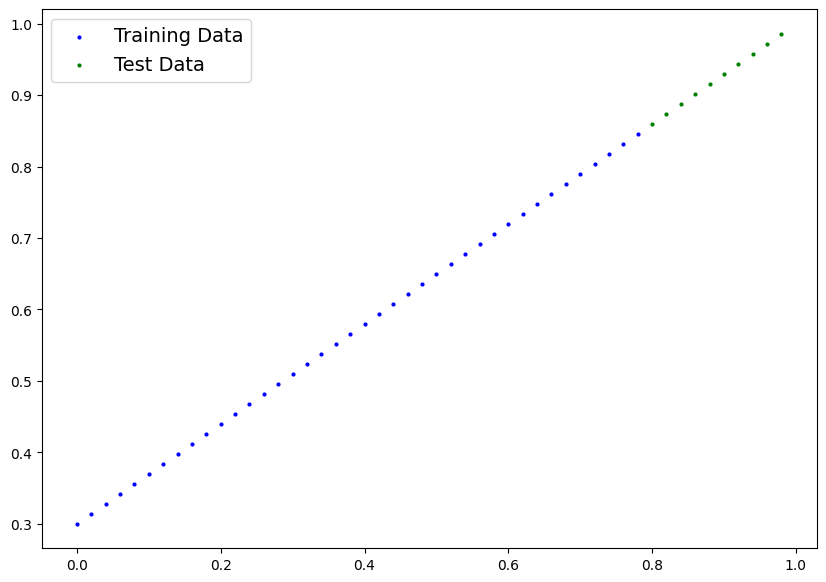

In [8]:
plot_predictions()

## Building aLinear Regression Model from Scratch
We will create a Linear Regression model class.

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [10]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- Almost everything in Pytorch inherits from the nn.Module
    def __init__(self):
        super().__init__()

        # Initialize Model Parameters
        self.weights = nn.Parameter(torch.rand(1, # <- start with a random weight and then try to adjust it to the ideal weight.
            requires_grad=True, # <- can this parameter be updated via the Gradient Descent method?
            dtype=torch.float # <- This the default data type in PyTorch, Pytorch loves this data type.
        ))
        
        self.bias = nn.Parameter(torch.rand(1, # <- start with a random bias and then try to adjust it to the ideal weight.
            requires_grad=True, # <- can this parameter be updated via the Gradient Descent method?
            dtype=torch.float # <- This the default data type in PyTorch, Pytorch loves this data type.
        ))
    
    # Forward method to define the computation
    def forward(self, x:torch.Tensor) -> torch.Tensor: # <- x is the input data.
        return self.weights * x + self.bias # This is the linear regression formula

### PyTorch model building essentials

* torch.nn - contains all the building blocks for computational graphs ( a neural network can be considered a computational graph).
* torch.nn.Parameter - what parameters should our model try and learn, ofthe a PyTorch layer from torch.nn will set this for us.
* torch.nn.Module - the base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim -  this is where all the optimizers in PyTorch live, they will help with gradient descent.
* def forward( - All nn.Module subclasses require you to override forward(), thsi method defines what happens in the forward computation.

### Checking the contents of out PyTorch model

Now we've created a model, lets see whats going on inside

So we can check our model parameters or whats inside our model using .parameters()

In [67]:
# Create a random seed
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)

# Create an instance of the model that we have created (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters of the model
model_0.parameters()


<generator object Module.parameters at 0x7fa8e694eab0>

In [32]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [33]:
# List all the parameters
model_0.state_dict(), weight, bias

(OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))]),
 0.7,
 0.3)

### Making predictions using "torch.inference_mode()"

* To check our models predictive power, we essentially mean how well it predicts y_test based on x_test.
* When we pass data through our model, its going to run it through the forward() method.

In [34]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [35]:
# Make predictions with model
# The word "Inference" is used interchangeably with the making predictions.

# with torch.no_grad():    # torch.no_grad is another alternative to using torch.inference_mode(), but it is older and slower.
#     y_preds = model_0(X_test)

with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds, y_test

(tensor([[1.6208],
         [1.6385],
         [1.6561],
         [1.6738],
         [1.6914],
         [1.7090],
         [1.7267],
         [1.7443],
         [1.7620],
         [1.7796]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

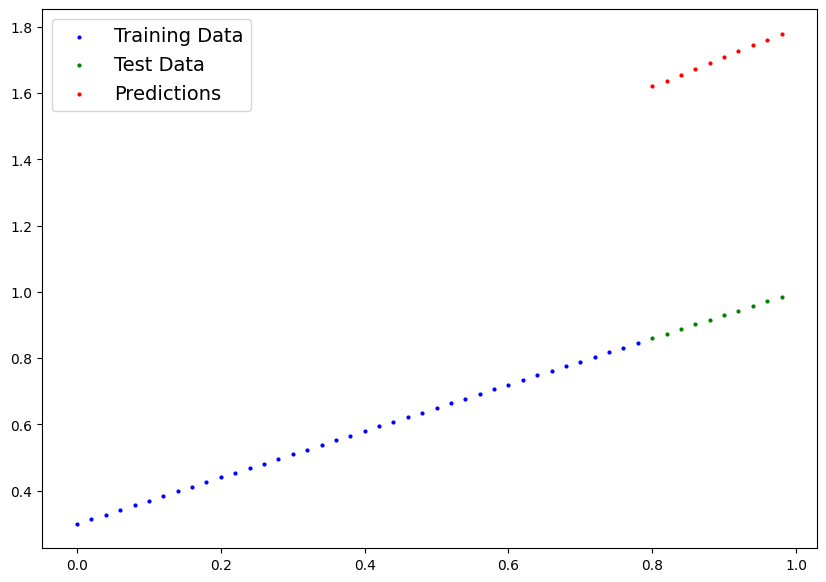

In [36]:
plot_predictions(predictions=y_preds)

### Train Model
unknown parameters (Random Variable) -> *known* parameters
Or in other words, from a poor representation of data to a better representation.

One way to measure how poor or how wrong your models predictions are is to use a loss function.
* Note: Loss function may also be called cost function or criterion in different areas. for our case, we're going to refer to it as loss function.

#### Things we need to train:

* **Loss function:** A function to measure how wrong your models predictions are to the ideal outputs, lower is better.
* **Optimizer:** Takes into account the loss or a model and adjusts the models parameters (e.g. weight and bias) to improve the loss function.

And specifically for PyTorch, we need:
* A training loop
* A testing loop



In [37]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [38]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [68]:
# Setup a loss function

# nn.L1Loss is the Mean Absolute Error(MAE), also known as L1 loss function.
# MAE_loss = torch.mean(torch.abs(y_preds, y_test))
# Or more simply
# MAE_loss = torch.nn.L1loss()

loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(
        params=model_0.parameters(),
        lr=0.01
    ) # lr = learning rate, an important hyper-parameter that you can set.
# The smaller the learning rate, the smaller the change in parameters, and vice versa

### Building a training (and a testing) loop in PyTorch

A couple of things we need in a training loop:

0. Loop through the data
1. Forward Pass (involves data moving through our model's `forward()` functions.) - also called forward propagation.
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move  backward through the network to calculate the gradients of each of the parameters of our mode with respect to the loss. (**back propagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [69]:
# An epoch is one loop through the data... 
# (this is a hyperparameter)
epochs = 200 
# epochs = 15

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

# Training
# 0. loop through the data...

for epoch in range(epochs):
    # Set the model to traing mode
    model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients.

    # 1. Forward Pass
    y_pred = model_0(X_train)

    # 2. Calculate Loss
    loss = loss_fn(y_pred, y_train)
    # print(f"Loss: {loss}")
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backward pass on the loss with respect to the parameters of the model
    loss.backward()

    # 5. Step the optimizer (perform gradient descent)
    optimizer.step() # by default how the optimizer changes will accumulate through the loop so we need to zero them above in step 3.

    # model_0.eval() # eval mode in PyTorch turns off gradient tracking
    
    # Testing
    model_0.eval() # turns off different settings in the model not needed for evaluation/testing (dropout/batch norm layers)
    with torch.inference_mode(): # turns off gradient tracking and a couple of more things behind the scenes
    # with torch.no_grad(): older and slower alternative to torch.inference_mode
        # 1. Do the forward pass
        test_pred = model_0(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)
        
    
    # Printing out what is happening
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)

        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
        # Print out the model state dict()
        print(model_0.state_dict())

Epoch: 0 | Loss: 0.6860889196395874 | Test Loss: 0.7637526988983154
OrderedDict([('weights', tensor([0.8784])), ('bias', tensor([0.9050]))])
Epoch: 10 | Loss: 0.5708791017532349 | Test Loss: 0.6290428042411804
OrderedDict([('weights', tensor([0.8394])), ('bias', tensor([0.8050]))])
Epoch: 20 | Loss: 0.45566922426223755 | Test Loss: 0.4943329691886902
OrderedDict([('weights', tensor([0.8004])), ('bias', tensor([0.7050]))])
Epoch: 30 | Loss: 0.34045934677124023 | Test Loss: 0.35962313413619995
OrderedDict([('weights', tensor([0.7614])), ('bias', tensor([0.6050]))])
Epoch: 40 | Loss: 0.2252494841814041 | Test Loss: 0.2249133139848709
OrderedDict([('weights', tensor([0.7224])), ('bias', tensor([0.5050]))])
Epoch: 50 | Loss: 0.1100396141409874 | Test Loss: 0.09020347893238068
OrderedDict([('weights', tensor([0.6834])), ('bias', tensor([0.4050]))])
Epoch: 60 | Loss: 0.009724985808134079 | Test Loss: 0.020998019725084305
OrderedDict([('weights', tensor([0.6539])), ('bias', tensor([0.3200]))])

Epoch: 110 | Loss: 0.007095950655639172 | Test Loss: 0.00754010071977973
OrderedDict([('weights', tensor([0.6938])), ('bias', tensor([0.2980]))])
Epoch: 120 | Loss: 0.007095950655639172 | Test Loss: 0.00754010071977973
OrderedDict([('weights', tensor([0.6938])), ('bias', tensor([0.2980]))])
Epoch: 130 | Loss: 0.007095950655639172 | Test Loss: 0.00754010071977973
OrderedDict([('weights', tensor([0.6938])), ('bias', tensor([0.2980]))])
Epoch: 140 | Loss: 0.007095950655639172 | Test Loss: 0.00754010071977973
OrderedDict([('weights', tensor([0.6938])), ('bias', tensor([0.2980]))])
Epoch: 150 | Loss: 0.007095950655639172 | Test Loss: 0.00754010071977973
OrderedDict([('weights', tensor([0.6938])), ('bias', tensor([0.2980]))])
Epoch: 160 | Loss: 0.007095950655639172 | Test Loss: 0.00754010071977973
OrderedDict([('weights', tensor([0.6938])), ('bias', tensor([0.2980]))])
Epoch: 170 | Loss: 0.007095950655639172 | Test Loss: 0.00754010071977973
OrderedDict([('weights', tensor([0.6938])), ('bias'

In [33]:
# Printing the loss function in order to monitor
print(f"Loss: {loss}")
model_0.state_dict()

Loss: 0.6515260338783264


OrderedDict([('weights', tensor([0.8667])), ('bias', tensor([0.8750]))])

In [23]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.8784])), ('bias', tensor([0.9050]))])

In [22]:
weight, bias

(0.7, 0.3)

### Ploting the Previous and new Predictions to Monitor

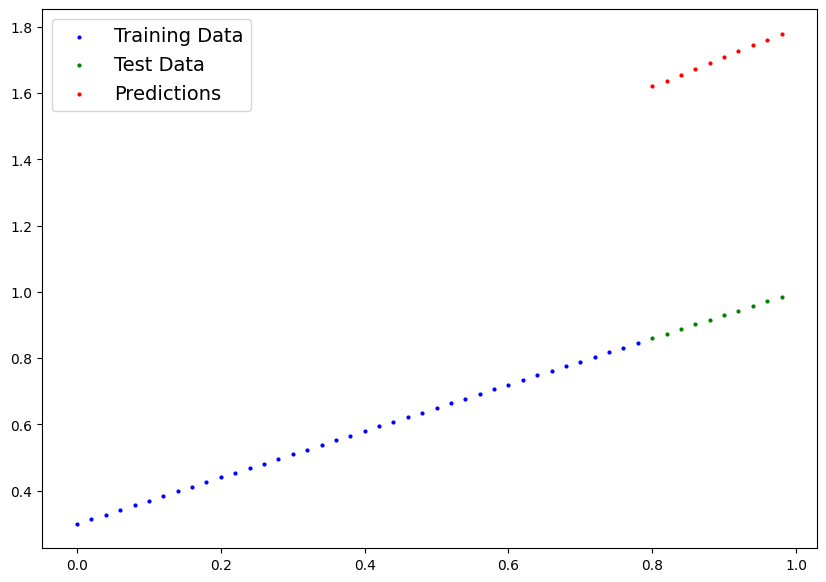

In [28]:
plot_predictions(predictions=y_preds)

In [29]:
with torch.inference_mode():
    y_preds_new = model_0.forward(X_test)

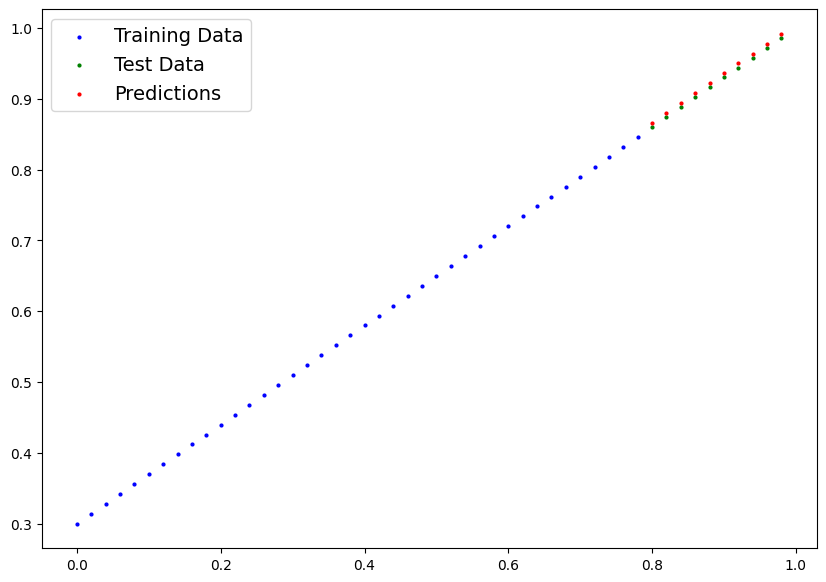

In [30]:
plot_predictions(predictions=y_preds_new)

We can see that by manully running the training loop a few dozen times, we have managed to get our predictions quite near to actual values.

### Plotting the Training and Testing loss curves

In [51]:
loss_values, test_loss_values, torch.tensor(loss_values).numpy()

([tensor(0.0071, grad_fn=<MeanBackward0>),
  tensor(0.0071, grad_fn=<MeanBackward0>),
  tensor(0.0071, grad_fn=<MeanBackward0>),
  tensor(0.0071, grad_fn=<MeanBackward0>),
  tensor(0.0071, grad_fn=<MeanBackward0>),
  tensor(0.0071, grad_fn=<MeanBackward0>),
  tensor(0.0071, grad_fn=<MeanBackward0>),
  tensor(0.0071, grad_fn=<MeanBackward0>),
  tensor(0.0071, grad_fn=<MeanBackward0>),
  tensor(0.0071, grad_fn=<MeanBackward0>)],
 [tensor(0.0075),
  tensor(0.0075),
  tensor(0.0075),
  tensor(0.0075),
  tensor(0.0075),
  tensor(0.0075),
  tensor(0.0075),
  tensor(0.0075),
  tensor(0.0075),
  tensor(0.0075)],
 array([0.00709595, 0.00709595, 0.00709595, 0.00709595, 0.00709595,
        0.00709595, 0.00709595, 0.00709595, 0.00709595, 0.00709595],
       dtype=float32))

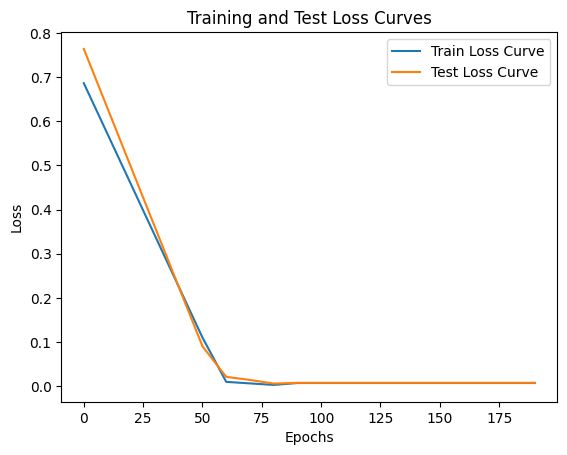

In [70]:
# Plotting the loss curves
plt.plot(epoch_count, torch.tensor(loss_values).numpy(), label="Train Loss Curve")
plt.plot(epoch_count, test_loss_values, label="Test Loss Curve")
plt.title("Training and Test Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

### Saving a model in PyTorch

There are three main methods one should know about for saving and loading models in PyTorch:

1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - allows you to load a model's saved state dictionary

In [71]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [73]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_torch_workflow_model_0.pt" # both (.pt) and (.pth) extensions can be used
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# MODEL_SAVE_PATH
# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)


Saving model to: models/01_torch_workflow_model_0.pt


## Loading a PyTorch model

Since we saved our model's state_dict() rather thatn the entire model, we will create a new instance of our model class and load the saved `state_dict()` into that.

In [74]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [79]:
# To load ina a saved state_dict() we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict() of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [78]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.3829])), ('bias', tensor([0.9593]))])

In [80]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [81]:
# Make some predictions with our loaded model
loaded_model_0.eval()

with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8661],
        [0.8801],
        [0.8940],
        [0.9080],
        [0.9220],
        [0.9359],
        [0.9499],
        [0.9638],
        [0.9778],
        [0.9917]])

In [82]:
# Comparing the laoded model predictions with original model predictions
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.8661],
        [0.8801],
        [0.8940],
        [0.9080],
        [0.9220],
        [0.9359],
        [0.9499],
        [0.9638],
        [0.9778],
        [0.9917]])

In [83]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### Putting it all together
Let's go back through the steps above and see it all in one place.

In [84]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.1.1+cu121'

#### Create Device-Agnostic code
This means that our code will use GPU if available, otherwise it will default to CPU.

In [85]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [86]:
!nvidia-smi

Thu Dec 14 23:44:18 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1650        Off | 00000000:01:00.0  On |                  N/A |
| N/A   37C    P5               8W /  50W |     57MiB /  4096MiB |     21%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [106]:
# Data
# Create some data using the linear regression formula of y = weight * X + bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (feature and labels)

X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will pop
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [107]:
# Split the data
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

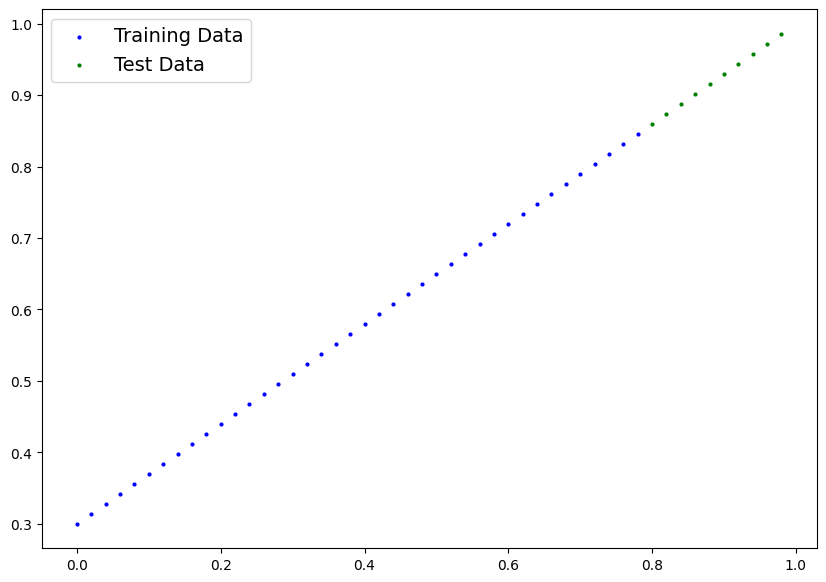

In [91]:
# Plot the data
# Note: Need to have the plot_predictions() function loaded otherwise it will output error.
plot_predictions(X_train, y_train, X_test, y_test)

### Building a PyTorch Linear Model (Linear Regression Model Version 2)

This time around, instead of creating the weights and biases manually using nn.Parameter(), we will use nn.Linear() to create the a linear layer that takes in 1 input and produces 1 output.

In [108]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(
            in_features=1,
            out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
    
# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [109]:
# Checking the model's current device
next(model_1.parameters()).device

device(type='cpu')

In [111]:
# Set the model to use the target device as defined in our Device Agnostic Code
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### Training
For training we need:
* Loss Function
* Optimizer
* Training Loop
* Testing Loop

In [112]:
# Setup loss funtion
loss_fn = nn.L1Loss() # the same as MAE (Mean Absolute Error)

# Setup our optimizers
optimizer = torch.optim.SGD(
    params=model_1.parameters(), 
    lr=0.01)


In [113]:
list(model_1.parameters()), model_1.state_dict()

([Parameter containing:
  tensor([[0.7645]], device='cuda:0', requires_grad=True),
  Parameter containing:
  tensor([0.8300], device='cuda:0', requires_grad=True)],
 OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='cuda:0')),
              ('linear_layer.bias', tensor([0.8300], device='cuda:0'))]))

In [114]:
# Write the training loop
torch.manual_seed(42)

# Putting data on the target device (Device Agnostic Code for Data)

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

epochs = 200

for epoch in range(epochs):
    model_1.train()

    # 1. Do the forward pass
    y_pred = model_1(X_train)

    # 2. Calculate the Loss
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backward pass
    loss.backward()

    # 5. Optimizer Step
    optimizer.step()


    # Testing
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)

        test_loss = loss_fn(test_pred, y_test)

    # Print out whats happening
        if epoch % 10 == 0:
            print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")




Epoch: 0 | Loss: 0.5551779270172119 | Test loss: 0.5739762187004089
Epoch: 10 | Loss: 0.439968079328537 | Test loss: 0.4392664134502411
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954833924770355 | Test loss: 0.16984669864177704
Epoch: 40 | Loss: 0.09433845430612564 | Test loss: 0.03513690456748009
Epoch: 50 | Loss: 0.023886388167738914 | Test loss: 0.04784907028079033
Epoch: 60 | Loss: 0.0199567973613739 | Test loss: 0.045803118497133255


Epoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.037530567497015
Epoch: 80 | Loss: 0.01308917161077261 | Test loss: 0.02994490973651409
Epoch: 90 | Loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Loss: 0.0062156799249351025 | Test loss: 0.014086711220443249
Epoch: 110 | Loss: 0.002787243574857712 | Test loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 140 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 150 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 160 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 170 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 180 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 190 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882


In [115]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [121]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    model_1_preds = model_1(X_test)
model_1_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

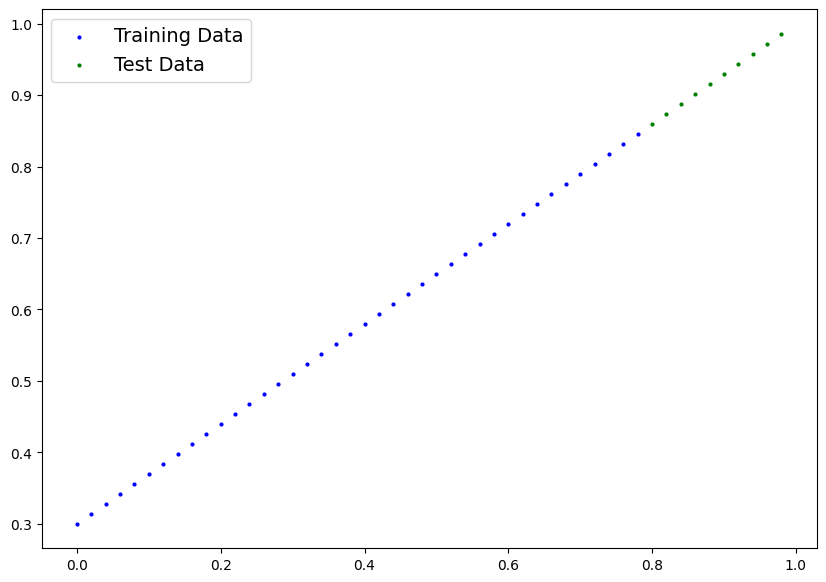

In [120]:
plot_predictions()

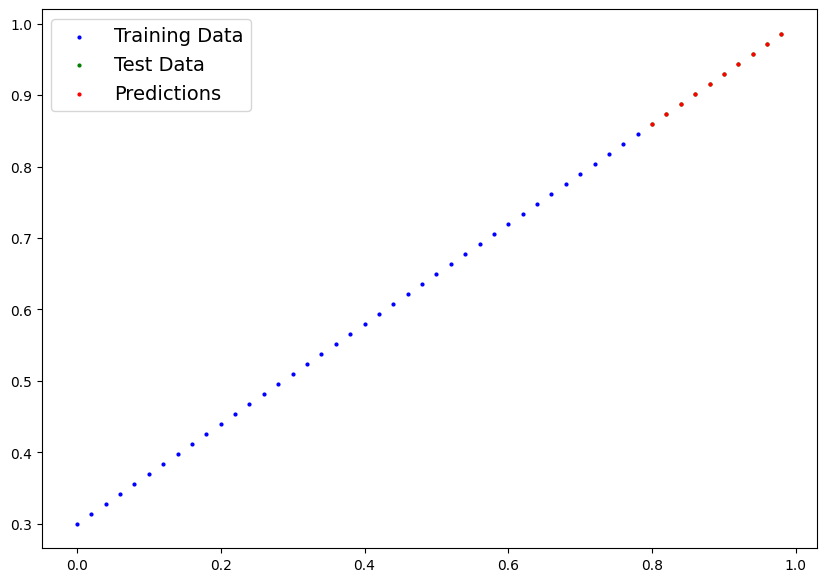

In [119]:
plot_predictions(predictions=model_1_preds.cpu())

In [124]:
# Saving and loading the model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pt"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# MODEL_SAVE_PATH
# 3. Save the model state dict
print(f"Saving mode to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving mode to: models/01_pytorch_workflow_model_1.pt


In [123]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [125]:
# Loading the model
loaded_model_1 = LinearRegressionModelV2()
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [126]:
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [129]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [127]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [137]:
# Evaluate the loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)

model_1_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

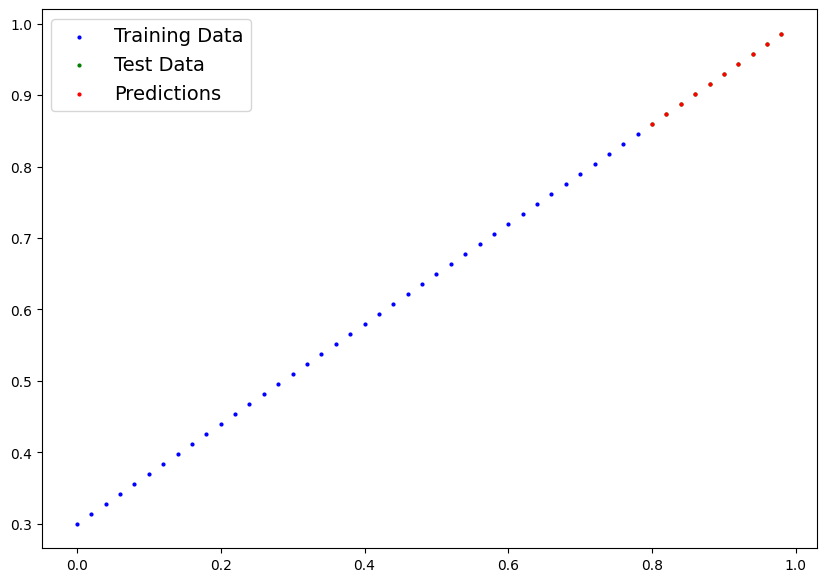

In [133]:
plot_predictions(predictions=loaded_model_1_preds.cpu())

## Practice

In [35]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [36]:
# Writing the device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"device: {device}")

device: cuda


Creating a linear data set for our problem

In [37]:
# Setting up the weights and biases
weight = 0.3
bias = 0.9

# Defining the ranges of our independent variable (X)
start = 5
stop = 10
step = 0.05

# Making data points for each independent variable.
X = torch.arange(start, stop, step).unsqueeze(dim=-1)

# Writing the Linear Regression Equation to map the independent variable to the dependent variable. (X -> y)
y = weight*X + bias

X, y, len(X), len(y)


(tensor([[5.0000],
         [5.0500],
         [5.1000],
         [5.1500],
         [5.2000],
         [5.2500],
         [5.3000],
         [5.3500],
         [5.4000],
         [5.4500],
         [5.5000],
         [5.5500],
         [5.6000],
         [5.6500],
         [5.7000],
         [5.7500],
         [5.8000],
         [5.8500],
         [5.9000],
         [5.9500],
         [6.0000],
         [6.0500],
         [6.1000],
         [6.1500],
         [6.2000],
         [6.2500],
         [6.3000],
         [6.3500],
         [6.4000],
         [6.4500],
         [6.5000],
         [6.5500],
         [6.6000],
         [6.6500],
         [6.7000],
         [6.7500],
         [6.8000],
         [6.8500],
         [6.9000],
         [6.9500],
         [7.0000],
         [7.0500],
         [7.1000],
         [7.1500],
         [7.2000],
         [7.2500],
         [7.3000],
         [7.3500],
         [7.4000],
         [7.4500],
         [7.5000],
         [7.5500],
         [7.

### Creating the Train Test split
We want an 80/20 split for our training and testing data

In [38]:
# Creating the train test split
split = int(len(X)*0.8)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

In [39]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    
    """
    Plots training Data, test Data and compares predictions.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in Blue
    plt.scatter(train_data, train_labels,
                 color = "blue",
                 s = 4,
                 label="Training Data")
    
    # Plot test data in Green
    plt.scatter(test_data, test_labels,
                 color = "green",
                 s = 4,
                 label="Test Data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label='Predictions')
    
    plt.legend(prop={"size":14})

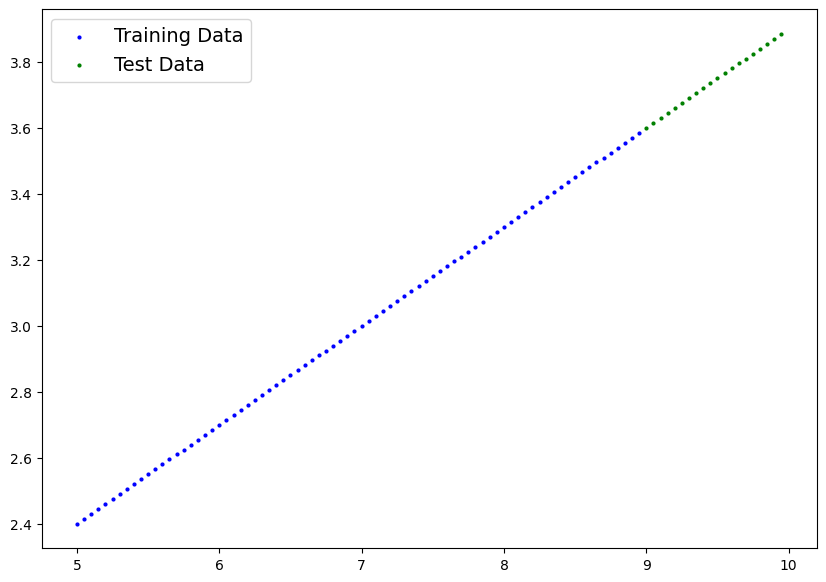

In [7]:
plot_predictions(X_train, y_train, X_test, y_test)


In [40]:
# Now we will create a simple Linear Regression Model in order to train and predict the outcomes
class LinearRegressionModelV3(nn.Module):
    def __init__(self):
        super().__init__()
        # self.linear_layer = nn.Linear(in_features=1,
        #                          out_features=1)
        self.weight = nn.Parameter(torch.randn(1,
                                    requires_grad=True,
                                    dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                    requires_grad=True,
                                    dtype=torch.float))

    def forward(self,x: torch.Tensor) -> torch.Tensor:
        # return self.linear_layer(x)
        return self.weight*x + self.bias

In [54]:
RANDOM_SEED = 7
torch.manual_seed(RANDOM_SEED)
model_2 = LinearRegressionModelV3()
model_2.state_dict()

OrderedDict([('weight', tensor([-0.1468])), ('bias', tensor([0.7861]))])

In [42]:

next(model_2.parameters()).device

device(type='cpu')

In [55]:
model_2.eval()
with torch.inference_mode():
    model_2_preds = model_2(X_test)
    
model_2_preds

tensor([[-0.5350],
        [-0.5424],
        [-0.5497],
        [-0.5570],
        [-0.5644],
        [-0.5717],
        [-0.5791],
        [-0.5864],
        [-0.5937],
        [-0.6011],
        [-0.6084],
        [-0.6158],
        [-0.6231],
        [-0.6304],
        [-0.6378],
        [-0.6451],
        [-0.6525],
        [-0.6598],
        [-0.6671],
        [-0.6745]])

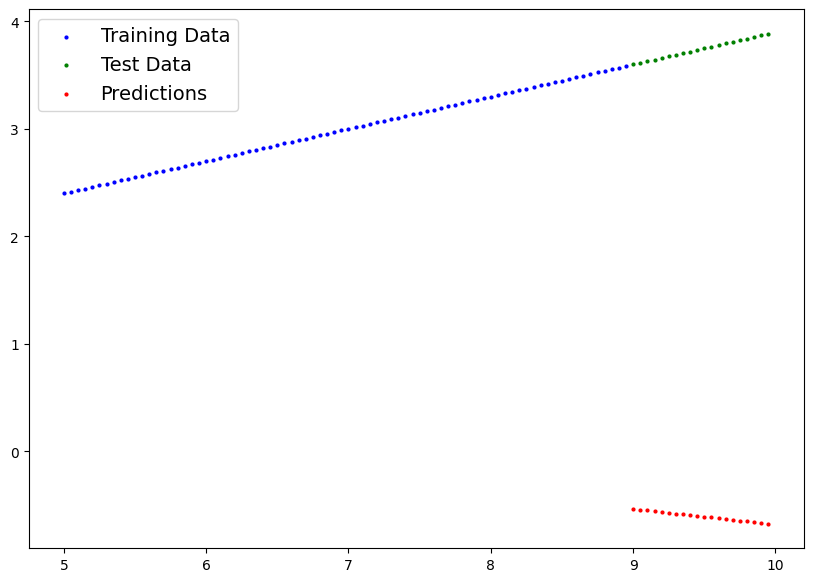

In [44]:
plot_predictions(predictions=model_2_preds)

In [56]:
# Defining the Optimizer and Loss functions
# The loss function, L1 loss, MAE (Mean Absolute Loss)
loss_fn = nn.L1Loss()

# First defining the learning rate
learning_rate = 0.001

# Optimizer functions, using the Stochastic Gradient Descent as Optimizer
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=learning_rate)

In [57]:
# The training loop
# Defining the Epochs
EPOCHS = 300

# Keeping track of the various parameters in order to track the learning of the model.
epoch_count = list()
loss_values = list()
test_loss_values = list()

# Training
# model_2.train()
for epoch in range(EPOCHS):
    model_2.train()
    epoch_count.append(epoch)
    # Do the forward pass
    y_pred = model_2(X_train)

    # Calculate the Loss
    loss = loss_fn(y_pred, y_train)
    # print(f"Loss: {loss}")
    loss_values.append(loss)

    # Optimizer zero grad
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Optimizer Step
    optimizer.step()

    # Testing
    model_2.eval()
    with torch.inference_mode():
        # Writing the test predictions
        test_preds = model_2(X_test)
        # Calculating the test loss
        test_loss = loss_fn(test_preds, y_test)
        test_loss_values.append(test_loss)
        
        # Printing the info
        if epoch % 15 == 0:
            print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")



Epoch: 0 | Loss: 3.2302544116973877 | Test Loss: 4.280154228210449
Epoch: 15 | Loss: 2.4854953289031982 | Test Loss: 3.2738327980041504
Epoch: 30 | Loss: 1.7407360076904297 | Test Loss: 2.2675108909606934
Epoch: 45 | Loss: 0.9959771037101746 | Test Loss: 1.2611892223358154
Epoch: 60 | Loss: 0.25121837854385376 | Test Loss: 0.25486820936203003
Epoch: 75 | Loss: 0.01501696091145277 | Test Loss: 0.06418323516845703
Epoch: 90 | Loss: 0.034633658826351166 | Test Loss: 0.0029048919677734375
Epoch: 105 | Loss: 0.01501696091145277 | Test Loss: 0.06418323516845703
Epoch: 120 | Loss: 0.034633658826351166 | Test Loss: 0.0029048919677734375
Epoch: 135 | Loss: 0.01501696091145277 | Test Loss: 0.06418323516845703
Epoch: 150 | Loss: 0.034633658826351166 | Test Loss: 0.0029048919677734375
Epoch: 165 | Loss: 0.01501696091145277 | Test Loss: 0.06418323516845703
Epoch: 180 | Loss: 0.034633658826351166 | Test Loss: 0.0029048919677734375
Epoch: 195 | Loss: 0.01501696091145277 | Test Loss: 0.064183235168457

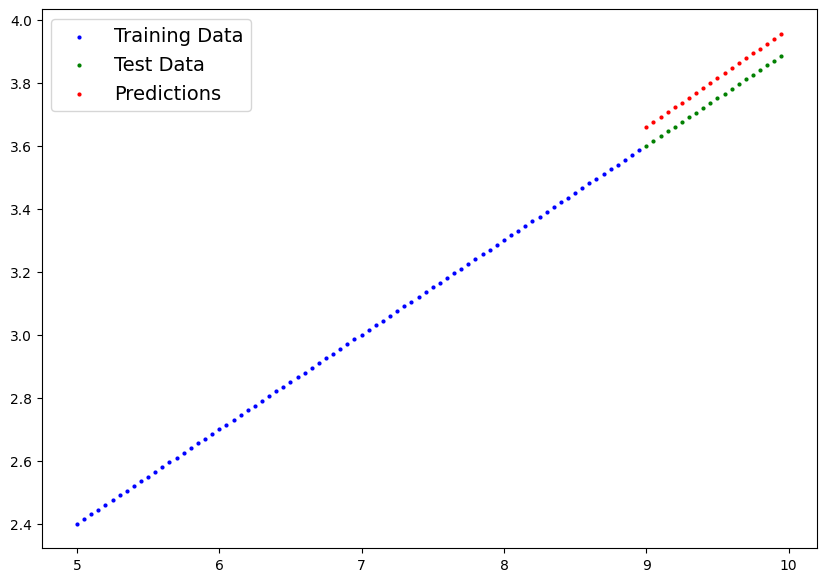

In [47]:
model_2.eval()
with torch.inference_mode():
    preds = model_2(X_test)
plot_predictions(predictions=preds)

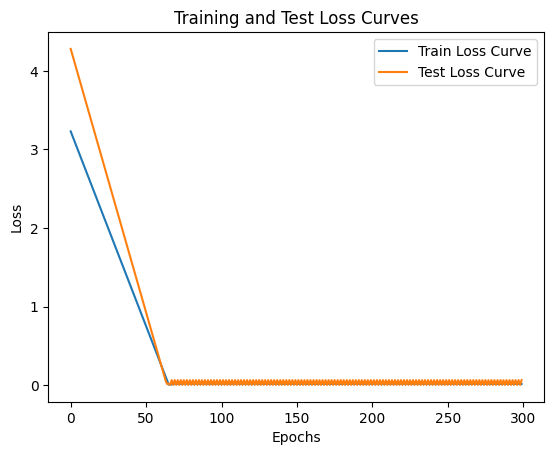

In [48]:
# Plotting the loss curves
plt.plot(epoch_count, torch.tensor(loss_values).numpy(), label="Train Loss Curve")
plt.plot(epoch_count, test_loss_values, label="Test Loss Curve")
plt.title("Training and Test Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [50]:
# Saving the Model
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)


MODEL_NAME = "01_torch_workflow_model_02.pt"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to models/01_torch_workflow_model_02.pt


In [51]:
# Loading the model
loaded_model_2 = LinearRegressionModelV3()
loaded_model_2.state_dict()

OrderedDict([('weight', tensor([0.9468])), ('bias', tensor([-1.1143]))])

In [52]:
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [53]:
loaded_model_2.state_dict()

OrderedDict([('weight', tensor([0.3118])), ('bias', tensor([0.8522]))])

In [58]:
loaded_model_2.eval()
with torch.inference_mode():
    loaded_model_2_preds = loaded_model_2(X_test)

loaded_model_2_preds

tensor([[3.6586],
        [3.6742],
        [3.6898],
        [3.7053],
        [3.7209],
        [3.7365],
        [3.7521],
        [3.7677],
        [3.7833],
        [3.7989],
        [3.8145],
        [3.8301],
        [3.8457],
        [3.8613],
        [3.8768],
        [3.8924],
        [3.9080],
        [3.9236],
        [3.9392],
        [3.9548]])

In [60]:
loaded_model_2_preds == preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [61]:
torch.cuda.is_available()

True

In [62]:
!nvidia-smi

Sat Dec 16 00:55:43 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1650        Off | 00000000:01:00.0 Off |                  N/A |
| N/A   32C    P8               3W /  50W |      8MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--